In [1]:
import numpy
import matplotlib.pyplot as plt

In [2]:
# NOTE: You should not change this cell

class KMeans:
    """ Simple K-Means implementation. Note that you can access
    the cluster means and the cluster assignments once you have
    called the "fit" function. The cluster means are stored in the
    variable 'cluster_means' and the assignments to the cluster
    means in 'cluster_assignments'. You can also use the function
    'assign_to_clusters' to obtain such assignments for a new set 
    X of points.
    """    
    
    def __init__(self, n_clusters=2, max_iter=100, seed=0, verbose=0):
        """ Constructor for the model.

        Parameters
        ----------
        n_clusters : int
            The number of clusters that should be
            found via the K-Means clustering approach.
        max_iter : int
            The maximum number of iterations (stopping condition)
        seed : int
            Number that is used to initialize the random 
            number generator.
        """
        
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.seed = seed
    
    def fit(self, X):
        """
        Fits the K-Means model. The final cluster assignments 
        (i.e., the indices) and the cluster means are stored
        in the variables 'cluster_assignments' and 'cluster_means',
        respectively, see the end of this function.

        Parameters
        ----------
        X : Array of shape [n_samples, n_features]
        """         
        
        # initialize the random number generator
        numpy.random.seed(self.seed)
        
        # select self.n_clusters random points from X
        # that depict the initial cluster centers
        random_indices = numpy.random.choice(len(X), self.n_clusters, replace=False)
        cluster_means = X[random_indices]
        
        current_iter = 0
        stop = False
        
        # do the following steps until the stopping condition is fulfilled
        while not stop:

            # (1) assign all the points to the cluster means
            cluster_assignments = self.assign_to_clusters(X, cluster_means)
            
            # (2) update the cluster means
            cluster_means = self._update_means(X, cluster_means, cluster_assignments)
            
            # increment counter and check for stopping condition
            current_iter = current_iter + 1
            if current_iter >= self.max_iter:
                stop = True
        
        # once done, store the cluster means and the assignments
        self.cluster_assignments = cluster_assignments
        self.cluster_means = cluster_means
        
    def assign_to_clusters(self, X, means):
        """
        Assigns all the points given in X to the 
        means; returns a Numpy array containing the
        assignments.

        Parameters
        ----------
        X : Array of shape [n_samples, n_features]
            The points for which the cluster assignments
            shall be computed.
        means : Array of shape [n_clusters, n_features]
            The cluster means.
        
        Returns
        -------
        assignments : Array of length n_samples
            For each element in X, it should contain
            the index of its closest cluster mean.
        """          
        
        assignments = []
        
        # for each data point in X
        for i in range(X.shape[0]):
            
            dists = []
            
            # compute distances to cluster centers
            for k in range(means.shape[0]):
                d = self._distance(X[i], means[k])
                dists.append(d)
                
            cluster_idx = numpy.argmin(numpy.array(dists))
            assignments.append(cluster_idx)

        assignments = numpy.array(assignments)
        
        return assignments
    
    def _update_means(self, X, means, assignments):
        """
        Updates the cluster means based on the new assignments
        of the points; returns the updated cluster means.

        Parameters
        ----------
        X : Array of shape [n_samples, n_features]
            The points.
        means : Array of shape [n_clusters, n_features]
            The current cluster means.
        assignments : Array of length n_samples
            The assignments of the points in X to the 
            cluster means.
        
        Returns
        -------
        updated_means : Array of shape [n_clusters, n_features]
            The updated cluster means.
        """              
        
        # array storing the updated cluster means
        updated_means = numpy.zeros(means.shape)
        
        # the cluster counts for the new cluster means
        cluster_counts = numpy.zeros(self.n_clusters)
        
        for i in range(len(X)):
            idx = assignments[i]
            updated_means[idx,:] += X[i]
            cluster_counts[idx] += 1
        
        for k in range(self.n_clusters):
            if cluster_counts[k] > 0:
                updated_means[k] /= cluster_counts[k]
        
        return updated_means
    
    def _distance(self, p, q):
        """
        Computes the squared Euclidean 
        distance between two points.        
        """
        
        d = ((q - p)**2).sum()
        
        return d

# Exercise 3.a

In [3]:
import numpy as np
import matplotlib
from matplotlib.pyplot import imread
import pylab
pylab.rcParams['figure.figsize'] = (14, 7)

The resulting cluster means:
[[ 4.29793023 80.28488372]
 [ 2.09433    54.75      ]]


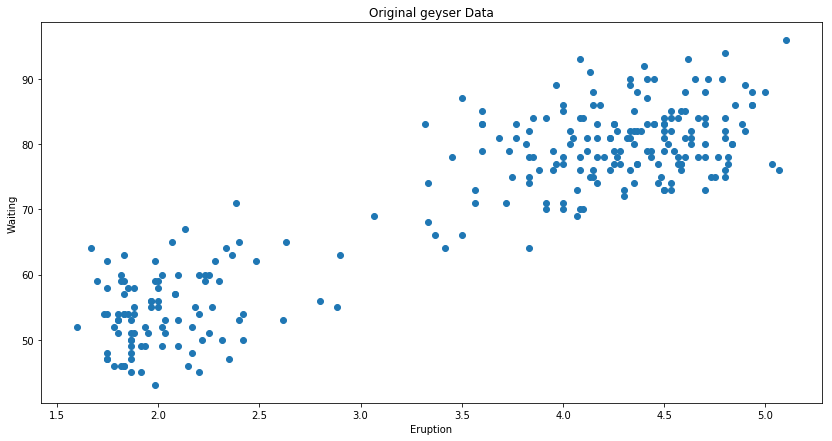

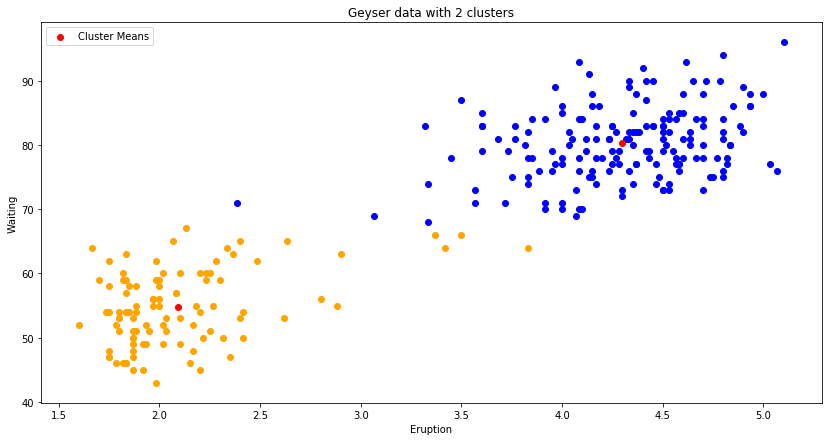

In [4]:
# The first row of the data has been skipped, as it is text
data = np.loadtxt("old_faithful.csv", delimiter=',', skiprows=1)

meanData = KMeans(n_clusters=2, max_iter=30, seed=0)
meanData.fit(data)

print(f"The resulting cluster means:\n{meanData.cluster_means}")
plt.title("Original geyser Data")
plt.xlabel("Eruption")
plt.ylabel("Waiting")
plt.scatter(data[:,0],data[:,1])
plt.show()

plt.title("Geyser data with 2 clusters")
plt.xlabel("Eruption")
plt.ylabel("Waiting")
for i in range(data.shape[0]):
    if (meanData.cluster_assignments[i] == 0):
        plt.scatter(data[i,0],data[i,1], color='blue')
    else:
        plt.scatter(data[i,0],data[i,1], color='orange')

plt.scatter(meanData.cluster_means[:,0], meanData.cluster_means[:,1], color='red', label="Cluster Means")
plt.legend()
plt.show()

# Exercise 3b

In [5]:
tinyImage = plt.imread("copenhagen_tiny.jpg")
bigImage = plt.imread("copenhagen.jpg")
np.random.seed(0)
def makeNewImg(image, n_clusters, max_iter, seed):
    # Fitting the model and saving variables we need later
    imgx   = image.shape[0]
    imgy   = image.shape[1]
    imgRGB = image.shape[2]
    model  = KMeans(n_clusters, max_iter, seed)
    image  = image.reshape((imgx*imgy),imgRGB)

    # When looking at larger images, we simply look at a
    # random subset of the image, and fit according to that
    # The value is at this point an arbitrary number picked
    # so that it separates the two images given.
    if (imgx*imgy > 50000):
        modLen = 5000

        temp = np.arange(0,(imgx*imgy),1).reshape((imgx*imgy))
        smallImgInd = np.random.choice(temp, modLen, False)

        model.fit(image[smallImgInd])
        model.cluster_assignments = model.assign_to_clusters(image, model.cluster_means)
    else:
        model.fit(image)
    
    # Changing the RGB values to be between 0 and 1, since 
    # RGB values when using floats are not in the range 0-255
    model.cluster_means = model.cluster_means/255
            
    # Finding the right cluster for each pixel and putting it all in
    # a return value of the same shape as the image
    retval = model.cluster_means[model.cluster_assignments]
        
    retval = retval.reshape((imgx,imgy,imgRGB))
    return retval, model.cluster_means

smallClusterImg = makeNewImg(tinyImage,5, 5,0)
bigClusterImg   = makeNewImg(bigImage, 16,5,0)

The resulting cluster means for this image are:
[[0.41773344 0.71691352 0.84028094]
 [0.13106363 0.12181295 0.11628755]
 [0.47558986 0.42848816 0.35511877]
 [0.76865056 0.87663444 0.90978927]
 [0.75330927 0.69978601 0.48412478]]


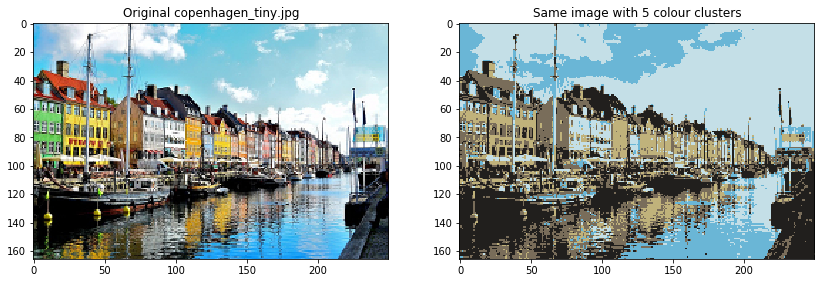

In [6]:
print(f"The resulting cluster means for this image are:\n{smallClusterImg[1]}")
plt.subplot(121)
plt.title("Original copenhagen_tiny.jpg")
plt.imshow(tinyImage)

plt.subplot(122)
plt.title("Same image with 5 colour clusters")
plt.imshow(smallClusterImg[0])

plt.show()

# Exercise 3c

The resulting cluster means for this image are:
[[0.49441064 0.46930358 0.42724814]
 [0.31073644 0.29808085 0.27156238]
 [0.66100118 0.828077   0.88582735]
 [0.44086687 0.80361197 0.43168215]
 [0.76419118 0.74735294 0.69117647]
 [0.07393128 0.06195302 0.06012036]
 [0.65701033 0.44427577 0.18943707]
 [0.58076367 0.58930857 0.57473684]
 [0.94262126 0.81946042 0.34577621]
 [0.25930767 0.3751634  0.48351489]
 [0.19096334 0.59283887 0.85473146]
 [0.5954125  0.66392897 0.70810211]
 [0.42336683 0.77392124 0.89866355]
 [0.45891803 0.513442   0.56130404]
 [0.71649763 0.62609872 0.4739689 ]
 [0.92123446 0.95420905 0.95794388]]


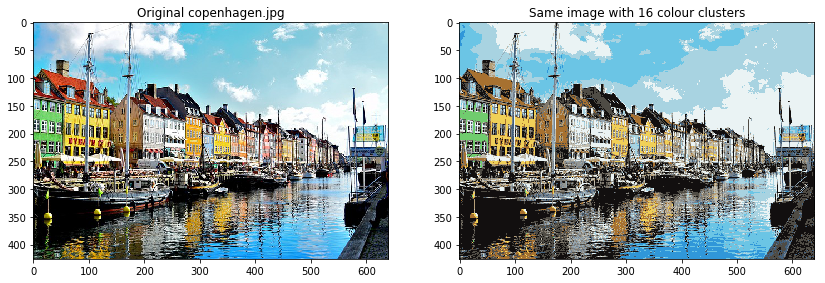

In [7]:
print(f"The resulting cluster means for this image are:\n{bigClusterImg[1]}")
plt.subplot(121)
plt.title("Original copenhagen.jpg")
plt.imshow(bigImage)

plt.subplot(122)
plt.title("Same image with 16 colour clusters")
plt.imshow(bigClusterImg[0])

plt.show()